##### 8. Проверка знаний

✍️ А теперь проверим полученные знания на практике. 
Для выполнения практических заданий нам понадобится новый датасет.

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:
1. age — возраст
2. sex — пол (1 - мужчина, 0 - женщина)
3. cp — тип боли в груди (4 значения)
4. trestbps — артериальное давление в покое
5. chol — холестерин сыворотки в мг/дл
6. fbs — уровень сахара в крови натощак > 120 мг/дл
7. restecg — результаты электрокардиографии в покое (значения 0,1,2)
8. thalach — достигнута максимальная частота сердечных сокращений
9. exang — стенокардия, вызванная физической нагрузкой
10. oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11. slope — наклон пикового сегмента ST при нагрузке
12. ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
13. thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

In [3]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Задание 8.1
# Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
# В ответ введите результат выполнения кода heart['old'].sum().
#apply() Применение функции к одной из осей фрейма данных
#lambda-функция может принимать любое количество аргументов, но может иметь только одно выражение.
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

*Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.*

Возраст (лет)	Мужчины	  Женщины
до 20	        123/76	  116/72
21-30	        126/79	  120/75
31-40	        129/81	  127/80
41-50	        135/83	  137/84
51-60	        142/85	  144/85
61 и старше	    142/80	  159/85

In [13]:
# Задание 8.2
# Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.
# Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

In [6]:
# Пример кода на Python (pandas)
# python
def get_trestbps_mean(age, sex): # Ключевое def слово используется для создания (или определения) функции. Метод get()возвращает значение элемента с указанным ключом.
    # sex: 1 — мужчина, 0 — женщина (или используйте ваши обозначения)
    if age <= 20:
        return 123 if sex == 1 else 116 # Ключевое return слово — выход из функции и возврат значения.
    elif 21 <= age <= 30:
        return 126 if sex == 1 else 120
    elif 31 <= age <= 40:
        return 129 if sex == 1 else 127
    elif 41 <= age <= 50:
        return 135 if sex == 1 else 137
    elif 51 <= age <= 60:
        return 142 if sex == 1 else 144
    elif age >= 61:
        return 142 if sex == 1 else 159
    else:
        # Для возраста младше 20 лет — используйте детские нормы или NaN
        return None

In [7]:
heart.loc[300]

age          68.0
sex           1.0
cp            0.0
trestbps    144.0
chol        193.0
fbs           1.0
restecg       1.0
thalach     141.0
exang         0.0
oldpeak       3.4
slope         1.0
ca            2.0
thal          3.0
target        0.0
old           1.0
Name: 300, dtype: float64

Условия и операторы If в Python
Эти условия можно использовать несколькими способами, чаще всего в «условных операторах» и циклах.
* «Оператор if» записывается с использованием ключевого слова *if* .
* Ключевое слово *elif* — это способ Python сказать: «Если предыдущие условия не верны, то попробуйте это условие».
* Ключевое слово *else* улавливает все, что не улавливается предыдущими условиями.
* Ключевое *def* слово используется для создания (или определения) функции.
* Ключевое *return* слово — выход из функции и возврат значения.

In [8]:
 heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [9]:
# Пример для DataFrame df с колонками 'age' и 'sex'
heart['trestbps_mean'] = heart.apply(lambda row: get_trestbps_mean(row['age'], row['sex']), axis=1) # row строка
heart['trestbps_mean'].loc[300]

142

Краткое объяснение
* Таблица норм давления по возрасту и полу взята из медицинских источников.
* Признак trestbps_mean позволит сравнивать индивидуальное давление пациента (trestbps) с нормой для его демографической группы.
* Для женщин и мужчин нормы немного различаются — используйте соответствующие значения.
Источники таблицы
* Нормы давления по возрасту и полу взяты из медицинских справочников и статей.
* Для большинства взрослых различие между полами незначительно, но оно есть, особенно в старших возрастных группах.
Итого:
* Создайте новый признак trestbps_mean на основе таблицы норм, используя возраст и пол пациента, чтобы получить среднее нормальное систолическое давление для сравнения с индивидуальным показателем.

In [10]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

dataframe.drop(labels, axis, index, columns, level, inplace, errors)

* labels - Этикетки. Если не указано иное, значения помечаются их индексом. Первое значение имеет индекс 0, второе значение — индекс 1 и т. д.
Эту метку можно использовать для доступа к указанному значению.
* axis - Метод set_axis() позволяет задать индекс указанной оси. Используйте axis='columns'параметр для установки меток столбцов. 0 - index, 1 - columns
* index - Свойство index возвращает информацию об индексе DataFrame.
* columns - Свойство columns возвращает метку каждого столбца в DataFrame.
* level -
* inplace -
* errors - 

Задание 8.3
Проанализируйте датасет и выберите категориальные признаки.
* sex - пол (1 - мужчина, 0 - женщина)
* cp - тип боли в груди (4 значения)
* fbs — уровень сахара в крови натощак > 120 мг/дл
oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
* restecg — результаты электрокардиографии в покое (значения 0,1,2)
* exang — стенокардия, вызванная физической нагрузкой
age — возраст
* slope — наклон пикового сегмента ST при нагрузке
* ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
* thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект
* target

Категориальные признаки — это признаки (или переменные), значения которых обозначают принадлежность объекта к определённой категории или группе, а не количественную характеристику.
Основные характеристики
Значения категориальных признаков — это метки, названия или коды, которые нельзя осмысленно складывать или усреднять.

Категориальные признаки часто представлены строками (например, "красный", "синий", "зелёный") или целыми числами, которые просто кодируют категории (например, 0 — "мужчина", 1 — "женщина").

Примеры: пол, город проживания, профессия, марка автомобиля, группа крови, национальность.

Виды категориальных признаков
Вид	                               Описание	                                                                        Примеры
Номинальные	                       Категории не имеют естественного порядка	                                        Цвет, город, пол
Порядковые (ординальные)	       Категории можно упорядочить, но разница между ними не измеряется количественно	Размер одежды (S, M, L), уровень образования

Особенности работы с категориальными признаками
* Для большинства алгоритмов машинного обучения такие признаки нужно преобразовывать в числовой формат (например, с помощью label encoding или one-hot encoding).

Категориальные признаки также называют номинальными или факторными.

Как отличить категориальный признак
* Если значения признака — это группы, а не числа, которые можно складывать или усреднять, то это категориальный признак.
* Если невозможно осмысленно вычислить среднее значение признака, скорее всего, он категориальный.

Примеры категориальных признаков:
* Пол (мужчина/женщина)
* Цвет автомобиля (красный, синий, чёрный)
* Город проживания (Москва, Санкт-Петербург, Казань)
* Группа крови (A, B, AB, O)

Категориальные признаки широко используются в анализе данных и требуют специальной обработки для использования в моделях машинного обучения.



In [11]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


In [12]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB


In [13]:
import category_encoders as ce

Задание 8.4
Вышеперечисленные категориальные признаки уже представлены в числовом виде. Проанализируйте их и назовите те, которые нуждаются в дополнительном кодировании значений (например, OneHotEncoding).
Учтите, что дополнительные методы кодирования требуются только для категориальных признаков с более чем двумя категориями. Бинарные признаки (принимающие два значения, такие как 0 и 1) не нуждаются в дополнительном кодировании.
sex
* cp
fbs
oldpeak
* restecg
exang
age
* slope
* ca
* thal
target
Признаки cp, restecg, slope, ca, thal представляют собой категориальные признаки с более чем двумя категориями и требуют дополнительного кодирования для использования в моделях машинного обучения.

In [14]:
# Задание 8.5
# Закодируйте вышеперечисленные признаки методом OneHotEncoding, удалив исходные признаки.
# Сколько признаков получилось в датасете?
import category_encoders as ce # импорт для работы с кодировщиком
encoder = ce.OneHotEncoder(cols=['cp'], use_cat_names=True) # указываем столбец для кодирования
cp_bin = encoder.fit_transform(heart['cp'])
heart1 = pd.concat([heart, cp_bin], axis=1)
heart1 = heart1.drop(['cp'], axis=1)
heart1.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean,cp_3.0,cp_2.0,cp_1.0,cp_0.0
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,1,142,1,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,129,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,137,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144,0,0,0,1


In [15]:
encoder = ce.OneHotEncoder(cols=['restecg'], use_cat_names=True) # указываем столбец для кодирования
restecg_bin = encoder.fit_transform(heart['restecg'])
heart1 = pd.concat([heart1, restecg_bin], axis=1)
heart1 = heart1.drop(['restecg'], axis=1)
heart1.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,target,old,trestbps_mean,cp_3.0,cp_2.0,cp_1.0,cp_0.0,restecg_0.0,restecg_1.0,restecg_2.0
0,63,1,145,233,1,150,0,2.3,0,0,...,1,1,142,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,1,0,129,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,...,1,0,137,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,2,0,...,1,0,142,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,...,1,0,144,0,0,0,1,0,1,0


In [16]:
encoder = ce.OneHotEncoder(cols=['slope'], use_cat_names=True) # указываем столбец для кодирования
slope_bin = encoder.fit_transform(heart['slope'])
heart1 = pd.concat([heart1, slope_bin], axis=1)
heart1 = heart1.drop(['slope'], axis=1)
heart1.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,...,cp_3.0,cp_2.0,cp_1.0,cp_0.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_0.0,slope_2.0,slope_1.0
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,2,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,2,...,0,0,1,0,1,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,2,...,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,2,...,0,0,0,1,0,1,0,0,1,0


In [17]:
encoder = ce.OneHotEncoder(cols=['ca'], use_cat_names=True) # указываем столбец для кодирования
ca_bin = encoder.fit_transform(heart['ca'])
heart1 = pd.concat([heart1, ca_bin], axis=1)
heart1 = heart1.drop(['ca'], axis=1)
heart1.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,thal,target,...,restecg_1.0,restecg_2.0,slope_0.0,slope_2.0,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0
0,63,1,145,233,1,150,0,2.3,1,1,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,2,1,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,2,1,...,0,0,0,1,0,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,2,1,...,1,0,0,1,0,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,2,1,...,1,0,0,1,0,1,0,0,0,0


In [18]:
encoder = ce.OneHotEncoder(cols=['thal'], use_cat_names=True) # указываем столбец для кодирования
thal_bin = encoder.fit_transform(heart['thal'])
heart1 = pd.concat([heart1, thal_bin], axis=1)
heart1 = heart1.drop(['thal'], axis=1)
heart1.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0


In [19]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    int64  
 11  cp_3.0         303 non-null    int64  
 12  cp_2.0         303 non-null    int64  
 13  cp_1.0         303 non-null    int64  
 14  cp_0.0         303 non-null    int64  
 15  restecg_0.0    303 non-null    int64  
 16  restecg_1.0    303 non-null    int64  
 17  restecg_2.0    303 non-null    int64  
 18  slope_0.0 

In [20]:
# Задание 8.6
# Нормализуйте все числовые признаки подходящим способом.
# В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.
from sklearn import preprocessing
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


In [21]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

Нормализация — один из методов преобразования входных признаков, при котором значения признаков приводятся к неким безразмерным единицам в рамках заданного диапазона (например, [0,...,1] или [-1,...,1]) либо с каким-то заданным свойством (например, стандартным отклонением, равным 1).
При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

In [22]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()
# кодируем исходный датасет
heart_mm = mm_scaler.fit_transform(heart)
heart_mm

array([[0.70833333, 1.        , 1.        , ..., 1.        , 1.        ,
        0.48484848],
       [0.16666667, 1.        , 0.66666667, ..., 1.        , 0.        ,
        0.09090909],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.33333333],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.        , 1.        ,
        0.48484848],
       [0.58333333, 1.        , 0.        , ..., 0.        , 0.        ,
        0.48484848],
       [0.58333333, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.54545455]])

In [23]:
col_names = list(heart.columns)
col_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target',
 'old',
 'trestbps_mean']

In [24]:
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_mm = pd.DataFrame(heart_mm, columns=col_names)
heart_mm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0,1.0,0.484848
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0,0.0,0.090909
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0,0.0,0.333333
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0,0.0,0.484848
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0,0.0,0.545455


Метод *describe()* возвращает описание данных в DataFrame.
Если DataFrame содержит числовые данные, описание содержит следующую информацию для каждого столбца:
1. count - Количество непустых значений.
2. mean - Среднее (среднее) значение.
3. std - Стандартное отклонение.
4. min - Минимальное значение.
5. 25% - 25% процентиль*.
6. 50% - 50% процентиль*.
7. 75% - 75% процентиль*.
8. max - Максимальное значение.
*Значение процентиля: сколько значений меньше заданного процентиля. Подробнее о процентилях читайте в главе «Процентили машинного обучения» .

In [26]:
heart_mm.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554,0.260726,0.474847
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835,0.439757,0.225389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000,0.000000,0.333333
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000,0.000000,0.484848
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000,1.000000,0.484848
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
round(heart_mm['chol'].std(),6)

0.118335

<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='chol', ylabel='Density'>

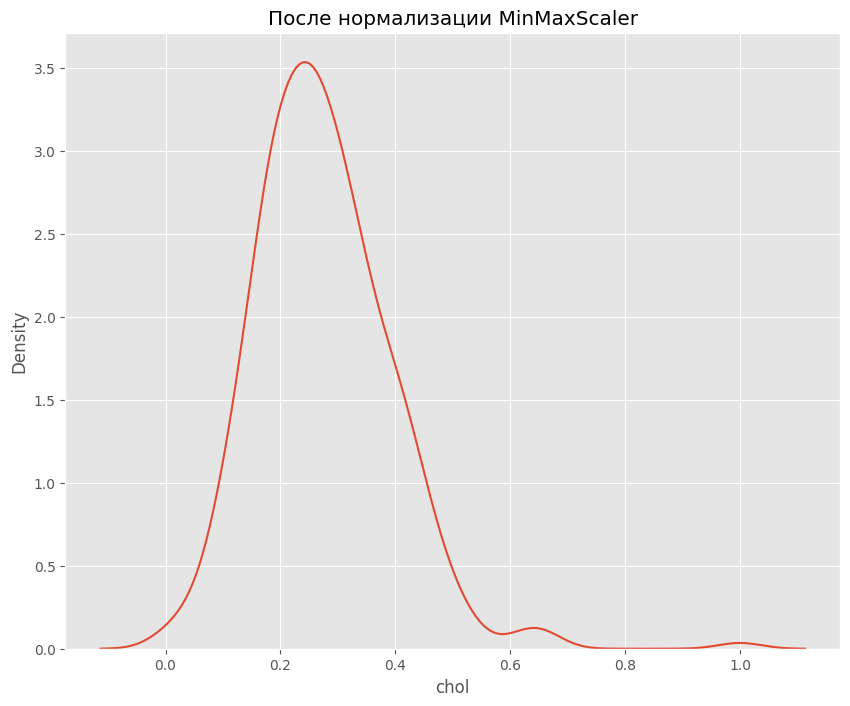

In [30]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')
sns.kdeplot(heart_mm['chol'], ax=ax1)

In [28]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
heart_r = r_scaler.fit_transform(heart)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_r = pd.DataFrame(heart_r, columns=col_names)
heart_r.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,0.592593,0.0,1.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,-1.0,0.0,-1.0,0.0,1.0,0.0
1,-1.333333,0.0,0.5,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,-1.0,0.0,0.0,0.0,0.0,-2.6
2,-1.037037,-1.0,0.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,1.0,0.0,0.0,0.0,0.0,-1.0
3,0.074074,0.0,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,1.0,0.0,0.0,0.0,0.0,0.0
4,0.148148,-1.0,-0.5,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,1.0,0.0,0.0,0.0,0.0,0.4


In [29]:
heart_r.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,-0.016502,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,0.399340,0.729373,0.313531,-0.455446,0.260726,-0.066007
std,0.672748,0.466011,0.516026,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,0.616226,1.022606,0.612277,0.498835,0.439757,1.487564
min,-1.925926,-1.000000,-0.500000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,-2.000000,-1.000000,0.000000,-3.200000
25%,-0.555556,-1.000000,-0.500000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,1.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,1.000000,4.000000,1.000000,0.000000,1.000000,3.400000


In [56]:
round(heart_r['chol'].std(),6)

0.816232

<Axes: title={'center': 'После нормализации RobustScaler'}, xlabel='chol', ylabel='Density'>

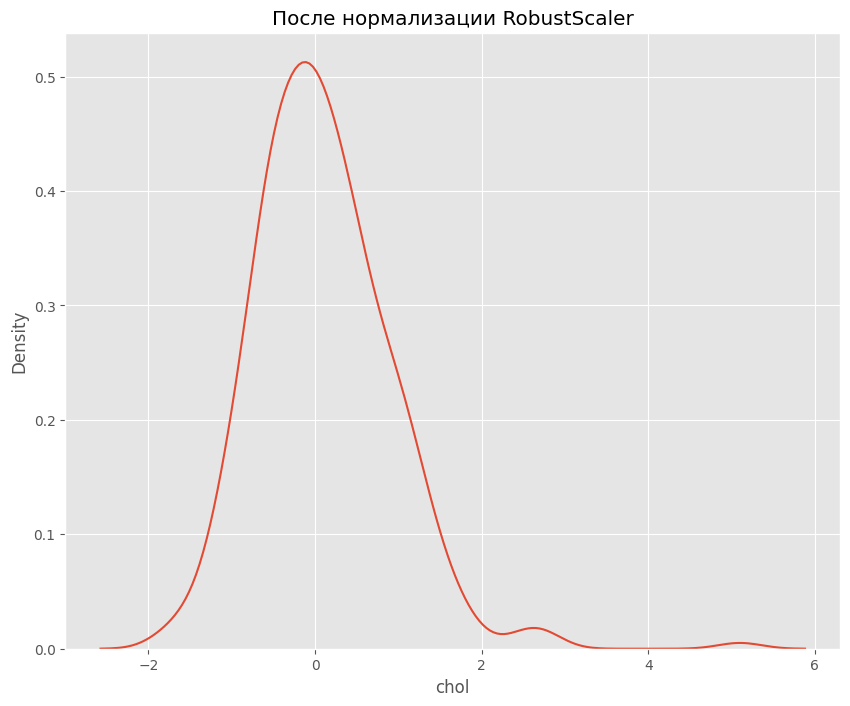

In [33]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации RobustScaler')
sns.kdeplot(heart_r['chol'], ax=ax1)

In [35]:
# Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, 
# а стандартное отклонение — 1. 
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()
# кодируем исходный датасет
heart_s = s_scaler.fit_transform(heart)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_s = pd.DataFrame(heart_s, columns=col_names)
heart_s.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529,1.683877,0.044446
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529,-0.593867,-1.706269
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529,-0.593867,-0.628906
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529,-0.593867,0.044446
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529,-0.593867,0.313786


In [36]:
heart_s.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000,3.030000e+02,3.030000e+02
mean,4.690051e-17,-1.407015e-16,2.345026e-17,-7.035077e-16,-1.113887e-16,-2.345026e-17,1.465641e-16,-6.800574e-16,-4.690051e-17,2.345026e-17,-1.407015e-16,-2.345026e-17,-1.641518e-16,0.000000,-8.207589e-17,1.811532e-15
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00,-1.093459,-5.938675e-01,-2.110281e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01,-1.093459,-5.938675e-01,-6.289063e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01,0.914529,-5.938675e-01,4.444567e-02
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00,0.914529,1.683877e+00,4.444567e-02
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00,0.914529,1.683877e+00,2.333842e+00


In [37]:
round(heart_s['chol'].std(),6)

1.001654

<Axes: title={'center': 'После нормализации StandardScaler'}, xlabel='chol', ylabel='Density'>

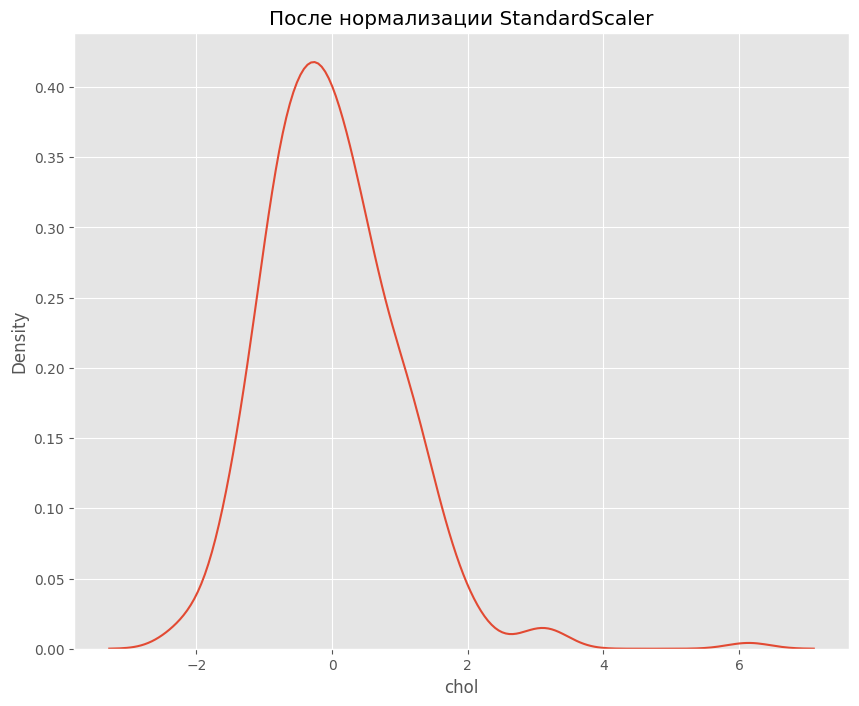

In [39]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации StandardScaler')
sns.kdeplot(heart_s['chol'], ax=ax1)

<Axes: >

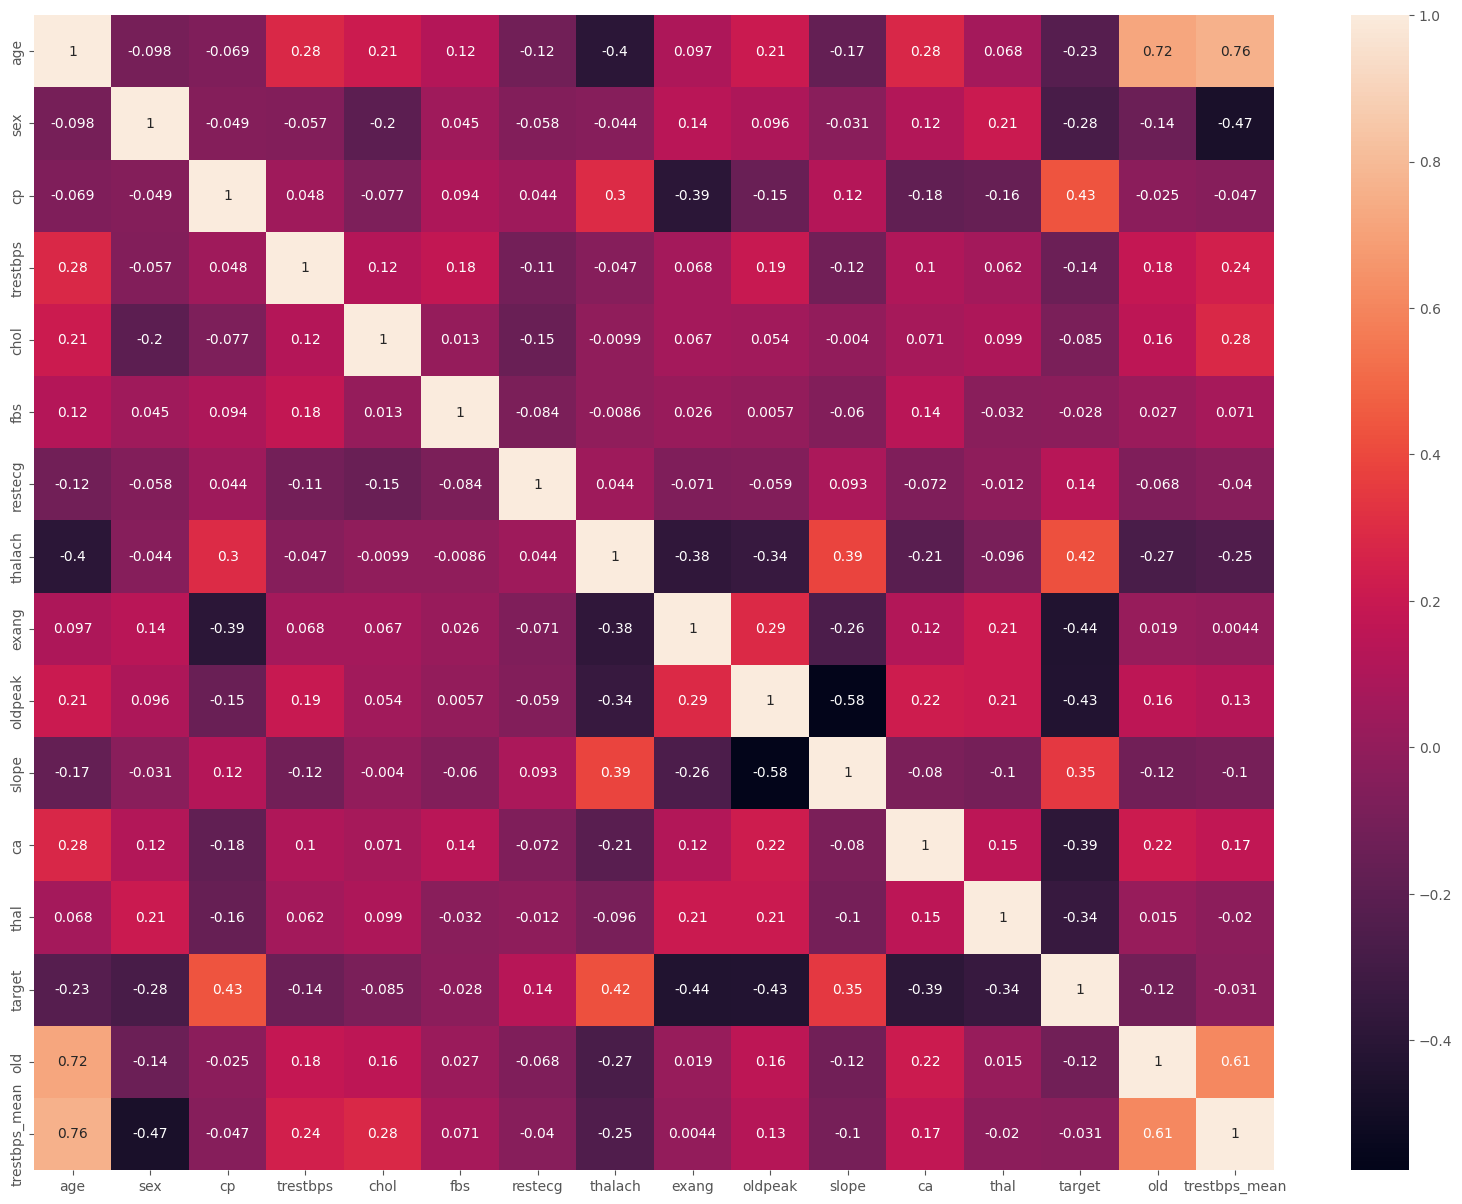

In [41]:
# data.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(heart.corr(numeric_only=True), annot=True)

Задание 8.7
Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.
* [age, old]
* [age, trestbps_mean]
[slope_1, slope_3]
[thal_1, thal_2]
[thal_3, thal_4]
[cp_1, ca_1]
[cp_1, cp_2]
* [thal_2, thal_3]
* [restecg_1, restecg_2]
* [slope_2, slope_3]
[age, exang]

<Axes: >

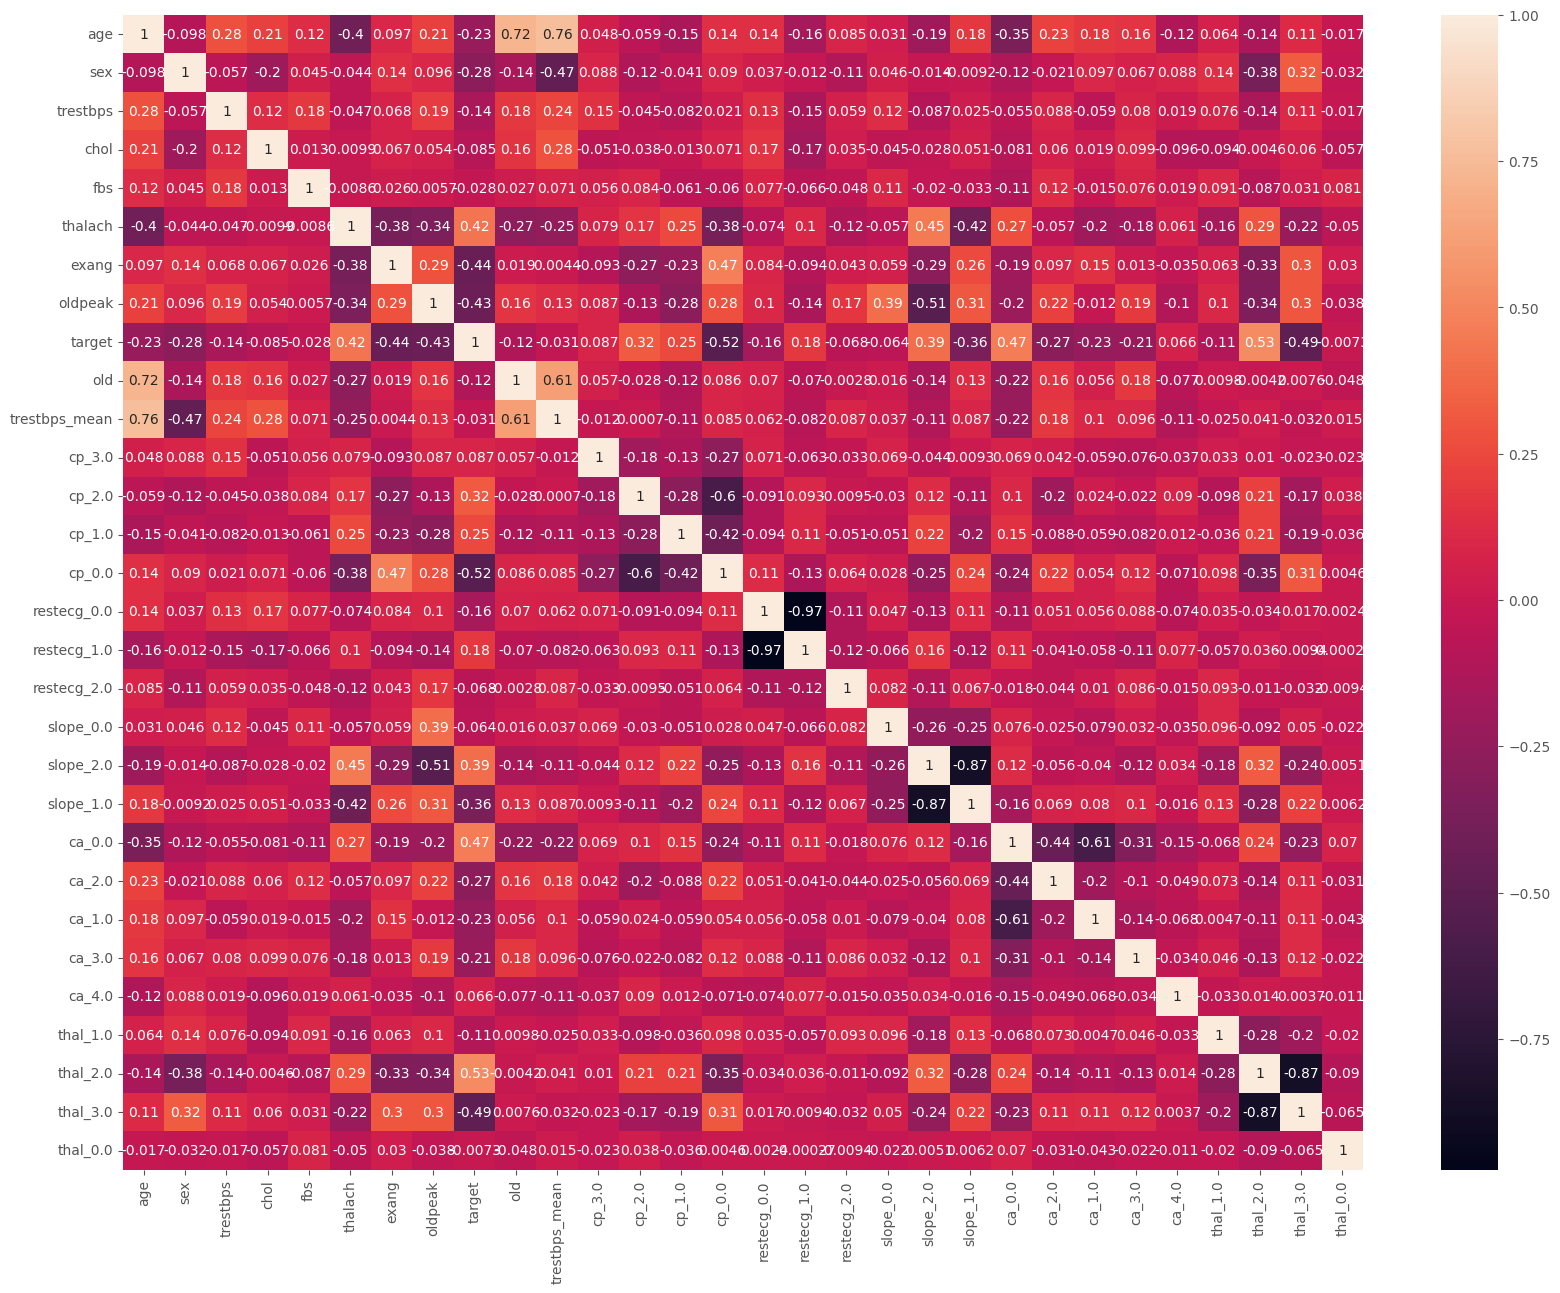

In [42]:
# data.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(heart1.corr(numeric_only=True), annot=True)